In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [3]:
#read the data
df_train=pd.read_csv('../data/train.csv')
df_train.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\1313175192.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [4]:
df_store = pd.read_csv('../data/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
# Fill missing values
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace=True)
df_store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df_store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
df_store['Promo2SinceWeek'].fillna(0, inplace=True)
df_store['Promo2SinceYear'].fillna(0, inplace=True)
df_store['PromoInterval'].fillna('Unknown', inplace=True)

# Validate
print(df_store.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_31580\1733712230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_31580\1733712230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [13]:
df_train . describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [11]:
df_store . describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1115.0,5396.614350,7654.513635,20.0,720.0,2325.0,6875.0,75860.0
CompetitionOpenSinceMonth,1115.0,4.930942,4.284924,0.0,0.0,4.0,9.0,12.0
CompetitionOpenSinceYear,1115.0,1370.939013,935.467654,0.0,0.0,2006.0,2011.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1115.0,12.083408,15.542241,0.0,0.0,1.0,22.0,50.0
Promo2SinceYear,1115.0,1030.239462,1006.038782,0.0,0.0,2009.0,2012.0,2015.0


In [12]:
#Merge the two datasets based on the store column on left
total_df = pd.merge(df_store,df_train, on='Store', how ='left')
print('Data has been successfully merged')

Data has been successfully merged


In [17]:
total_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,Unknown,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,Unknown,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,Unknown,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,Unknown,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,Unknown,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [18]:
#change datat type into data format
df_train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [19]:
lis = ['DayOfWeek' , 'StateHoliday' , 'SchoolHoliday']
for i in lis:
    print(i)
    print(total_df[i].unique())
    print('--------------------')

DayOfWeek
[5 4 3 2 1 7 6]
--------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
--------------------
SchoolHoliday
[1 0]
--------------------


In [13]:
#change data types object to int
total_df.loc[total_df['StateHoliday']== '0', 'StateHoliday'] = 0
total_df.loc[total_df['StateHoliday']== 'a', 'StateHoliday'] = 1
total_df.loc[total_df['StateHoliday']== 'b', 'StateHoliday'] = 2
total_df.loc[total_df['StateHoliday']== 'c', 'StateHoliday'] = 3

#store the value with same column name i.e stateHoliday with function astype 
total_df['StateHoliday'] = total_df['StateHoliday'].astype(int, copy=False)

In [14]:
#change data types object to int
total_df.loc[total_df['Assortment']== 'a', 'Assortment'] = 0
total_df.loc[total_df['Assortment']== 'b', 'Assortment'] = 1
total_df.loc[total_df['Assortment']== 'c', 'Assortment'] = 2

#store the value with same column name i.e stateHoliday with function astype 
total_df['Assortment'] = total_df['Assortment'].astype(int, copy=False)

In [22]:
#change data types object to int
total_df.loc[total_df['StoreType']== 'a', 'StoreType'] = 0
total_df.loc[total_df['StoreType']== 'b', 'StoreType'] = 1
total_df.loc[total_df['StoreType']== 'c', 'StoreType'] = 2
total_df.loc[total_df['StoreType']== 'd', 'StoreType'] = 3

#store the value with same column name i.e stateHoliday with function astype 
total_df['StoreType'] = total_df['StoreType'].astype(int, copy=False)

In [15]:
print(total_df[['StateHoliday','Assortment','StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [16]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  int32  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [17]:
#code for changing format of date from object to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format = '%Y-%m-%d')

In [22]:
#code for change object into date format
total_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(total_df['Date']).month

In [18]:
#code for to change float to integer
total_df['CompetitionOpenSinceYear'] = total_df['CompetitionOpenSinceYear'].astype(int)
total_df['Promo2SinceYear'] = total_df['Promo2SinceYear'].astype(int)

In [20]:
total_df['CompetitionDistance'] = total_df['CompetitionDistance'].astype(int)
total_df['Promo2SinceWeek'] = total_df['Promo2SinceWeek'].astype(int)

In [23]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  int32         
 3   CompetitionDistance        1017209 non-null  int32         
 4   CompetitionOpenSinceMonth  1017209 non-null  int32         
 5   CompetitionOpenSinceYear   1017209 non-null  int32         
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  int32         
 8   Promo2SinceYear            1017209 non-null  int32         
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


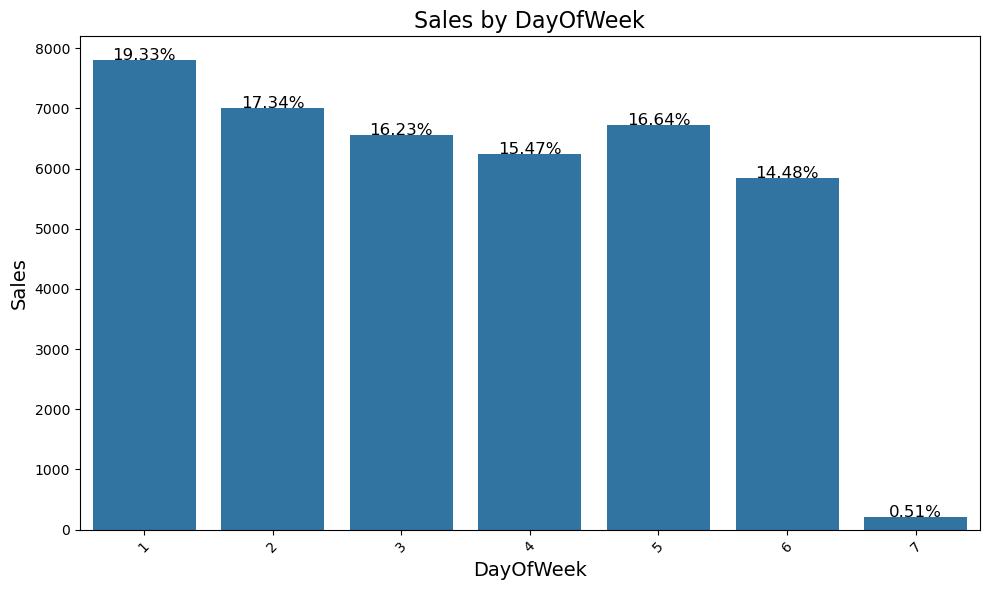

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


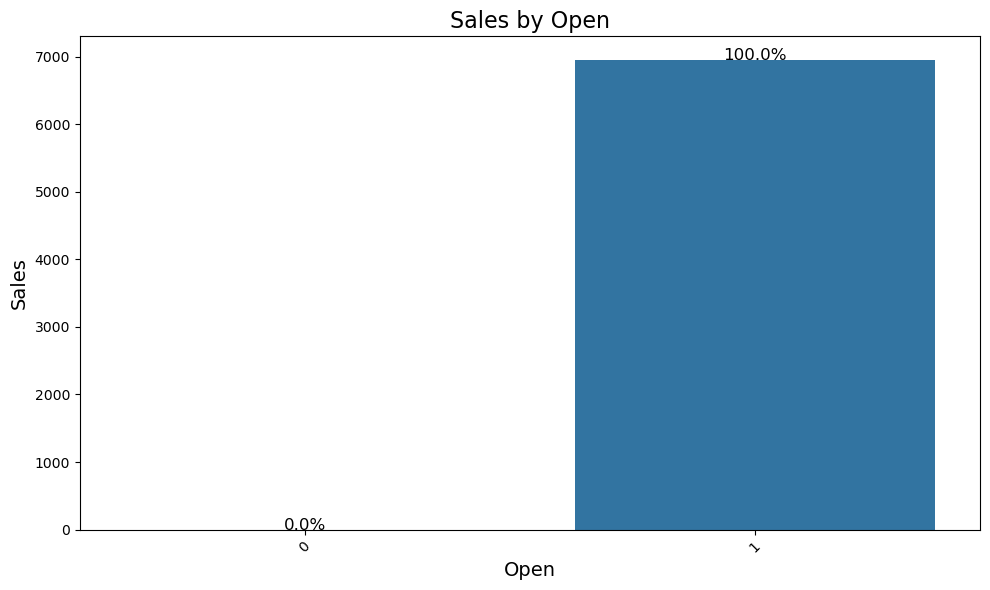

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


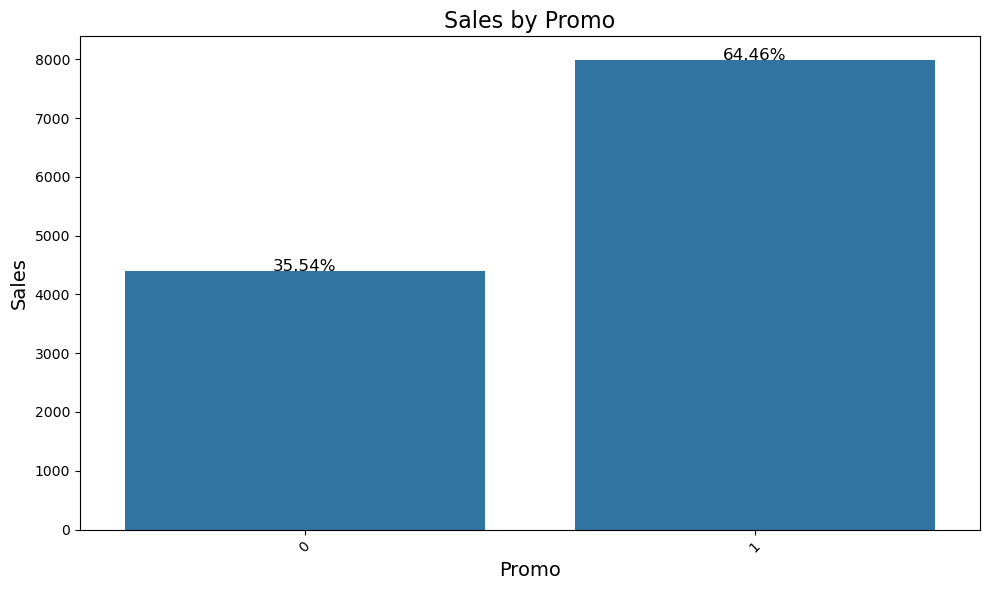

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


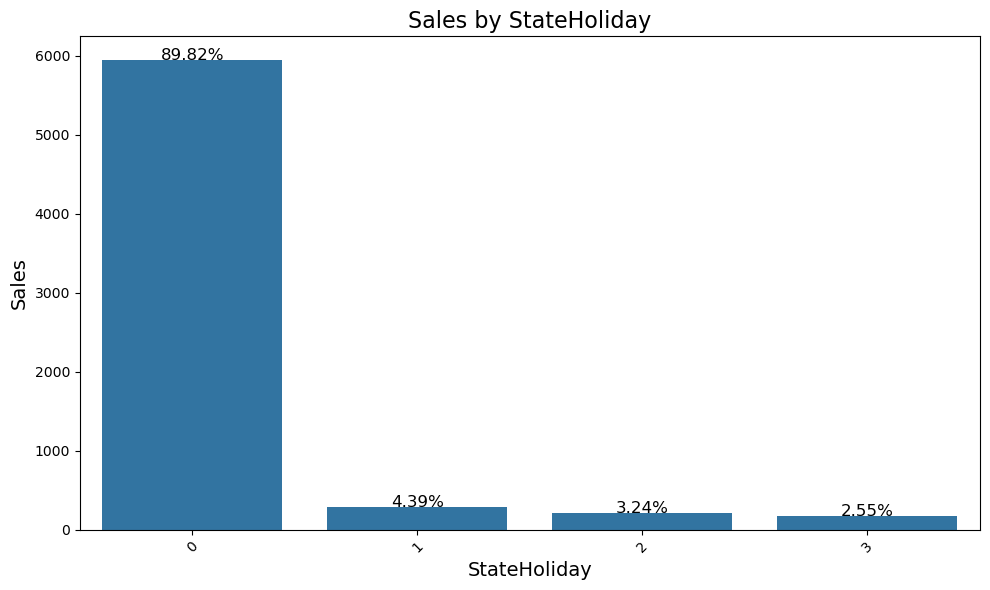

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


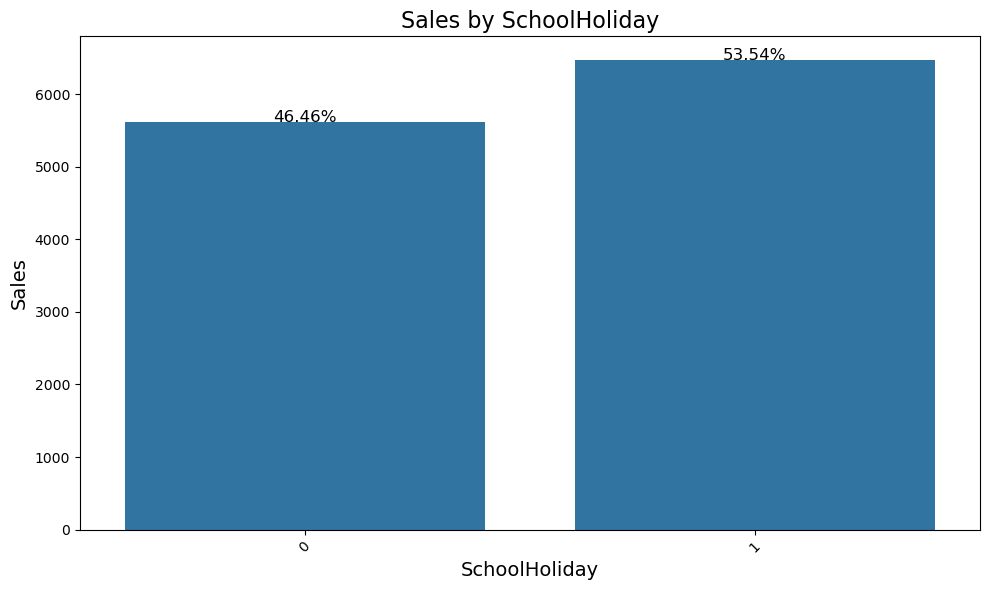

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


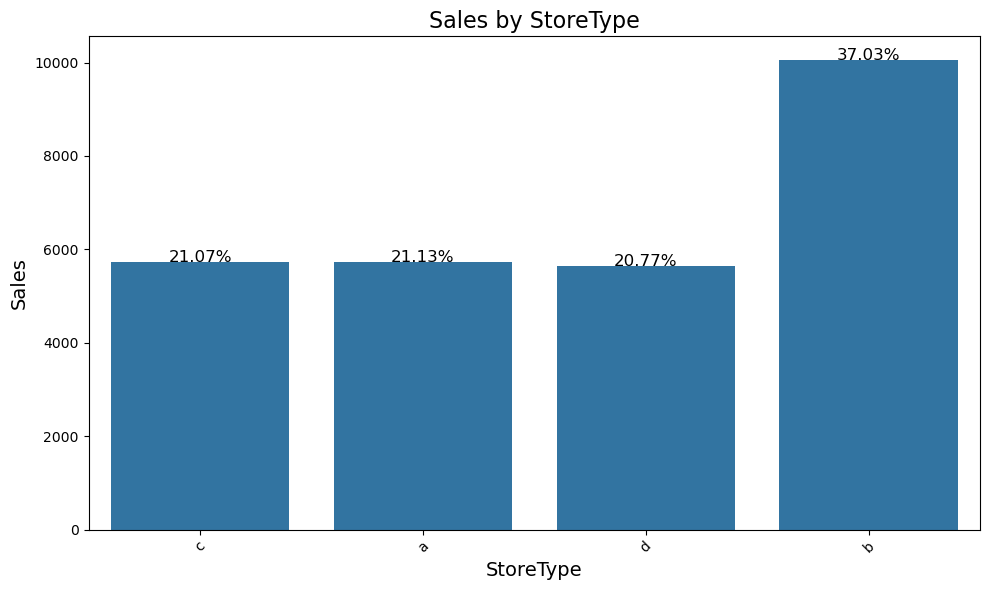

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


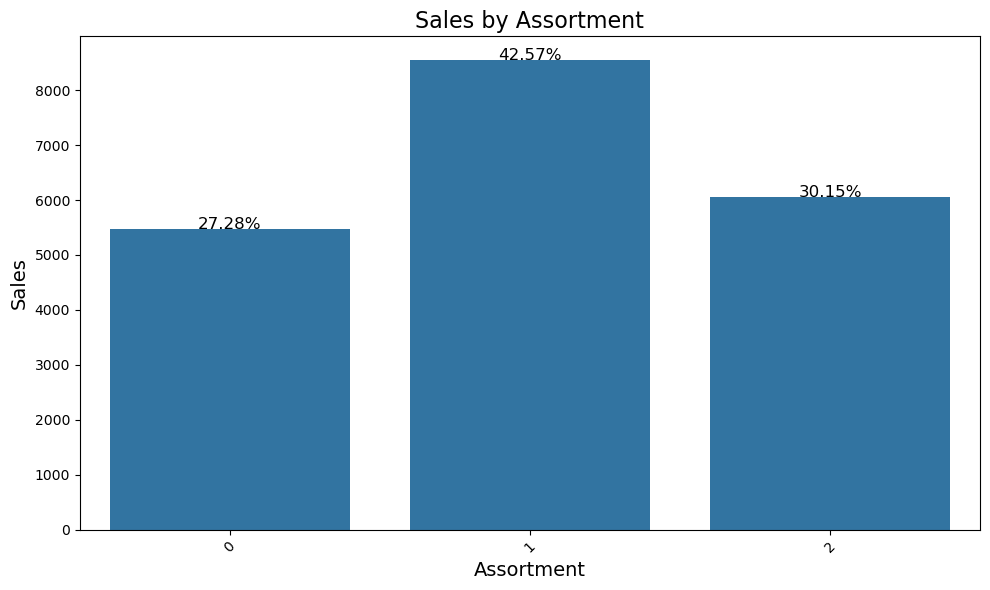

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


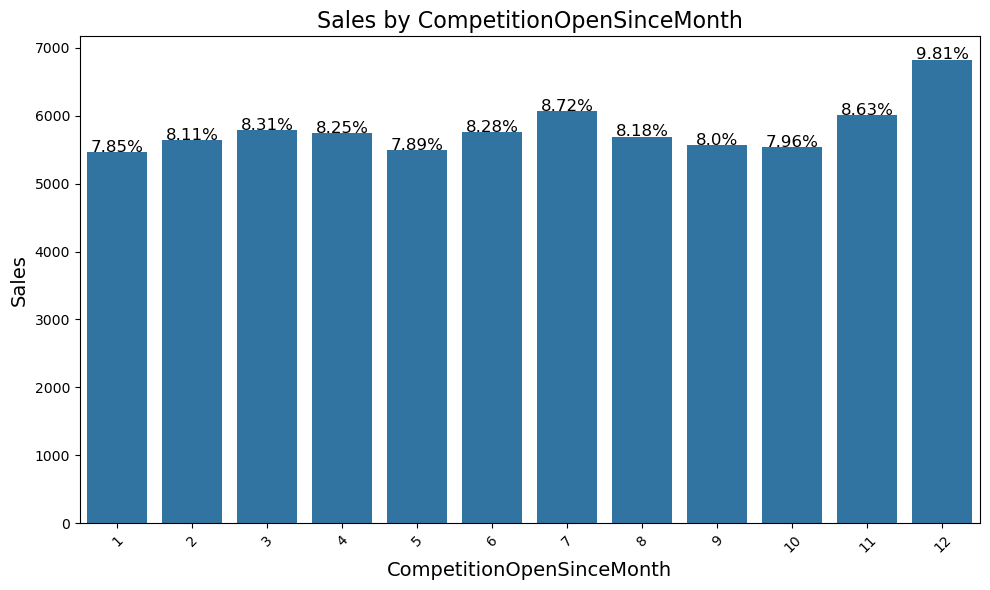

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


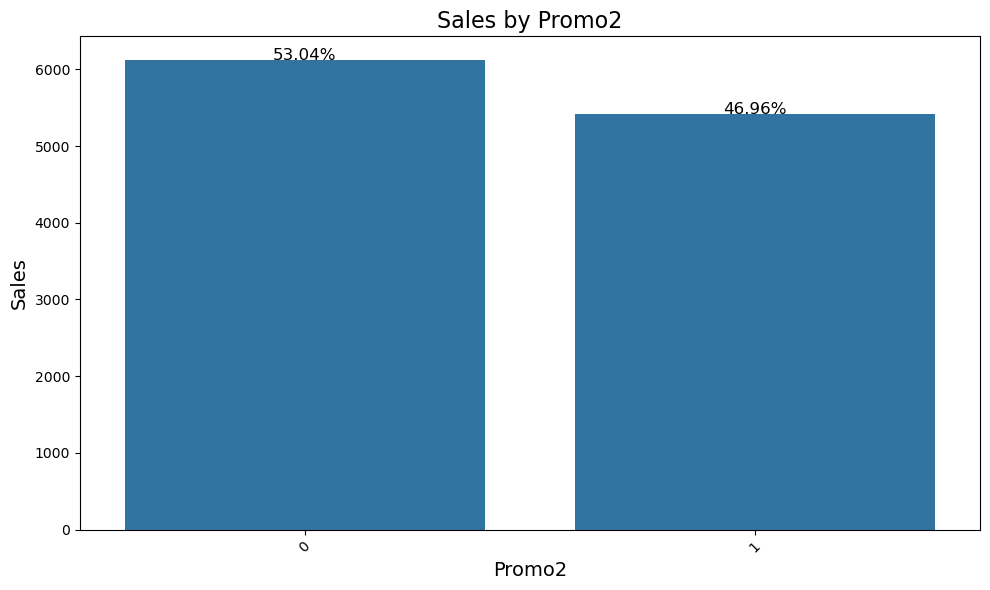

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


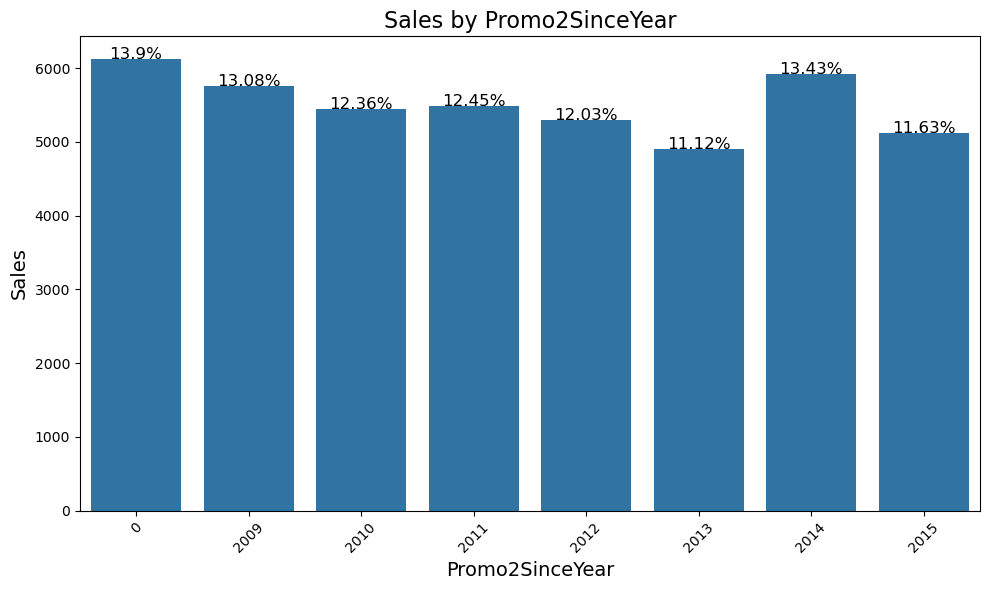

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\372770268.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)


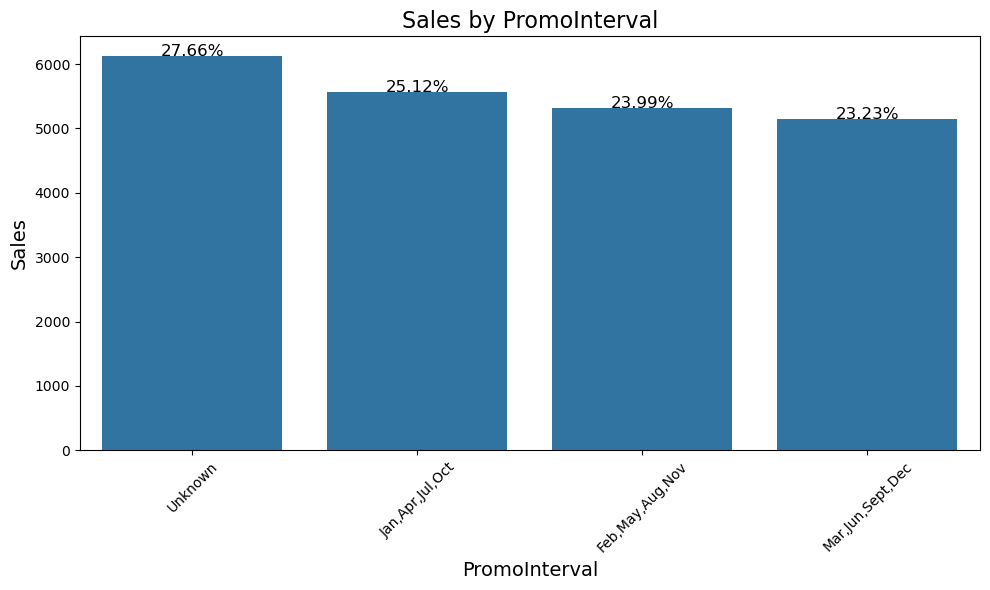

In [31]:
##code for barplots of the categorical variables against sales
#iterating over the catagorical variable and plotting each of them
total_df.columns = total_df.columns.str.strip()
# Define categorical variables without extra spaces
catagorical_variables = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                         'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 
                         'Promo2', 'Promo2SinceYear', 'PromoInterval']

# Iterate over categorical variables and plot barplots
for value in catagorical_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ci=None)
    
    totals = [p.get_height() for p in ax.patches]
    total = sum(totals)
    
    for p in ax.patches: 
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5,
                f"{round((p.get_height() / total) * 100, 2)}%", ha='center', fontsize=12)
    
    plt.title(f"Sales by {value}", fontsize=16)
    plt.xlabel(value, fontsize=14)
    plt.ylabel("Sales", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

        

<Axes: xlabel='Open', ylabel='Sales'>

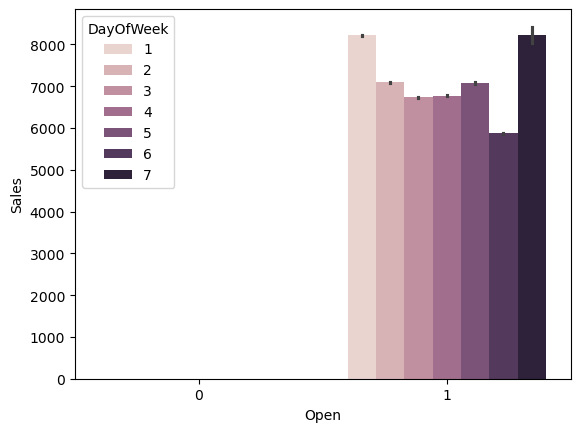

In [32]:
#open and storetype relationship 
#this indicates open suggests that whethere the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=total_df['Open'],y=total_df['Sales'],hue=total_df['DayOfWeek'])

Text(0.5, 1.0, 'plot between sales and competition open since year')

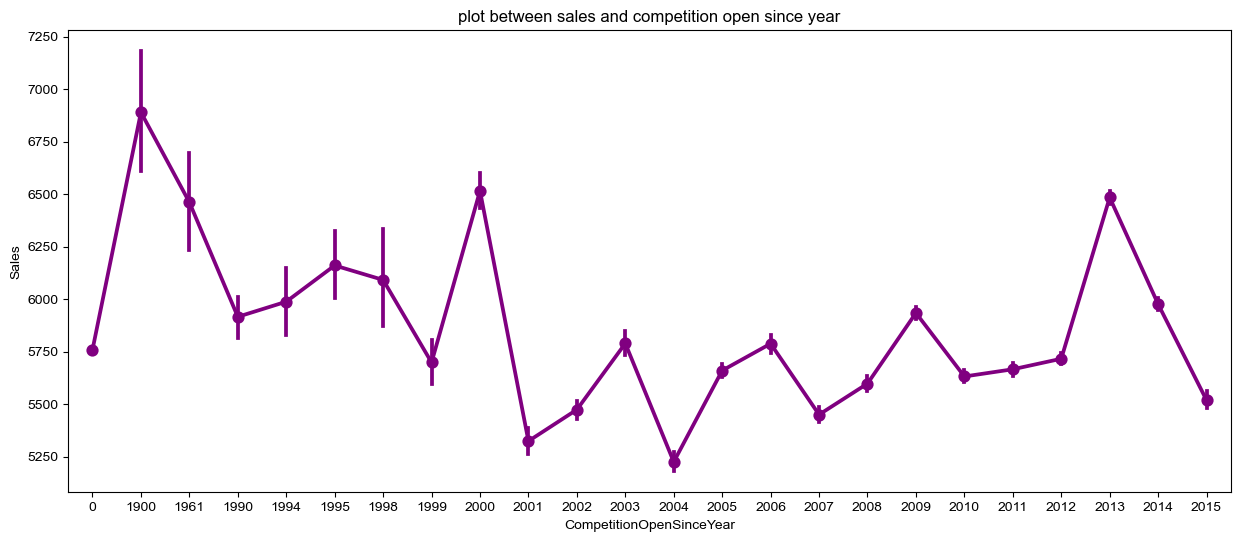

In [34]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales' , data=total_df,color ='purple')
sns.set_style('dark')
plt.title('plot between sales and competition open since year')

Text(0.5, 1.0, 'plot between sales and competition open since Month')

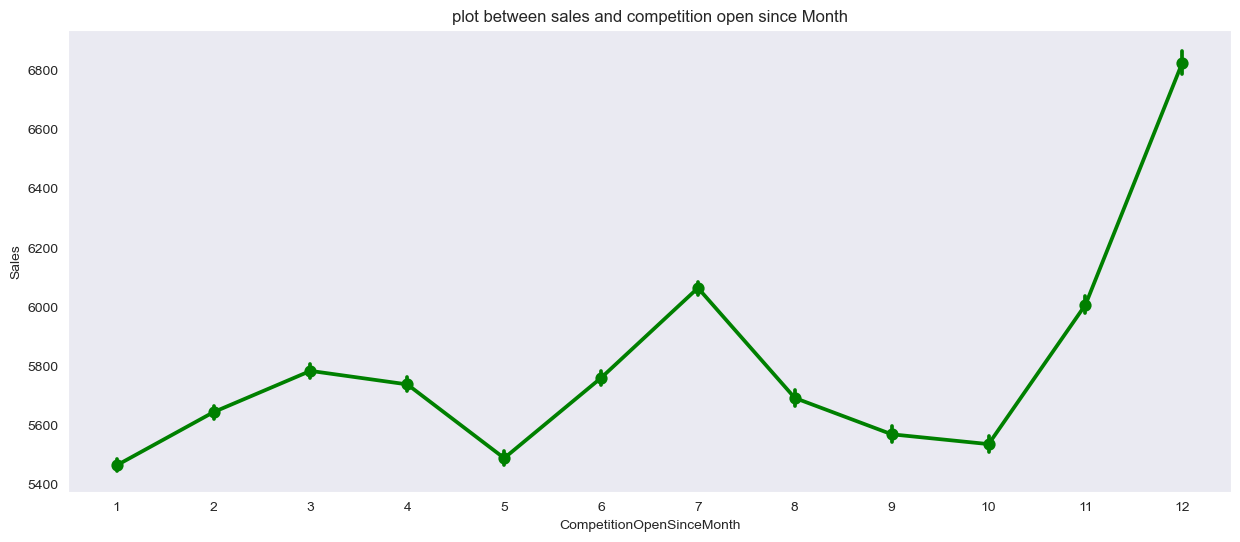

In [35]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales' , data=total_df,color ='green')
sns.set_style('dark')
plt.title('plot between sales and competition open since Month')

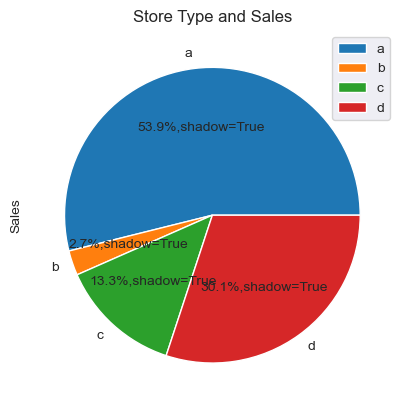

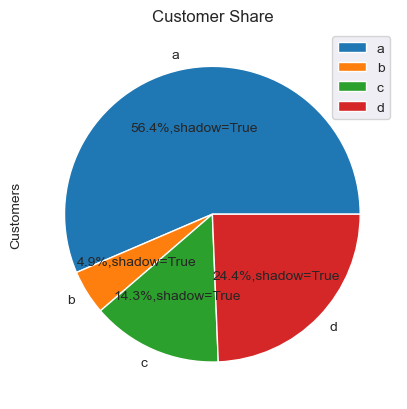

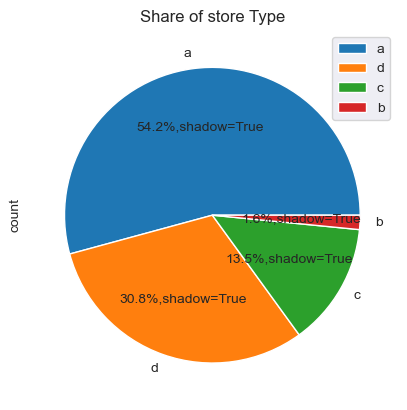

In [36]:
#let's explore store type a bit and it's influence on sales 
total_df.groupby('StoreType')['Sales'].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%,shadow=True')
plt.show()
#customers and store type 
total_df.groupby('StoreType')['Customers'].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%,shadow=True')
plt.show()
#store types in all of the dataset
total_df['StoreType'].value_counts().plot.pie(title='Share of store Type', legend=True, autopct='%1.1f%%,shadow=True')
plt.show()


Text(0.5, 1.0, 'Boxplot For Sales values')

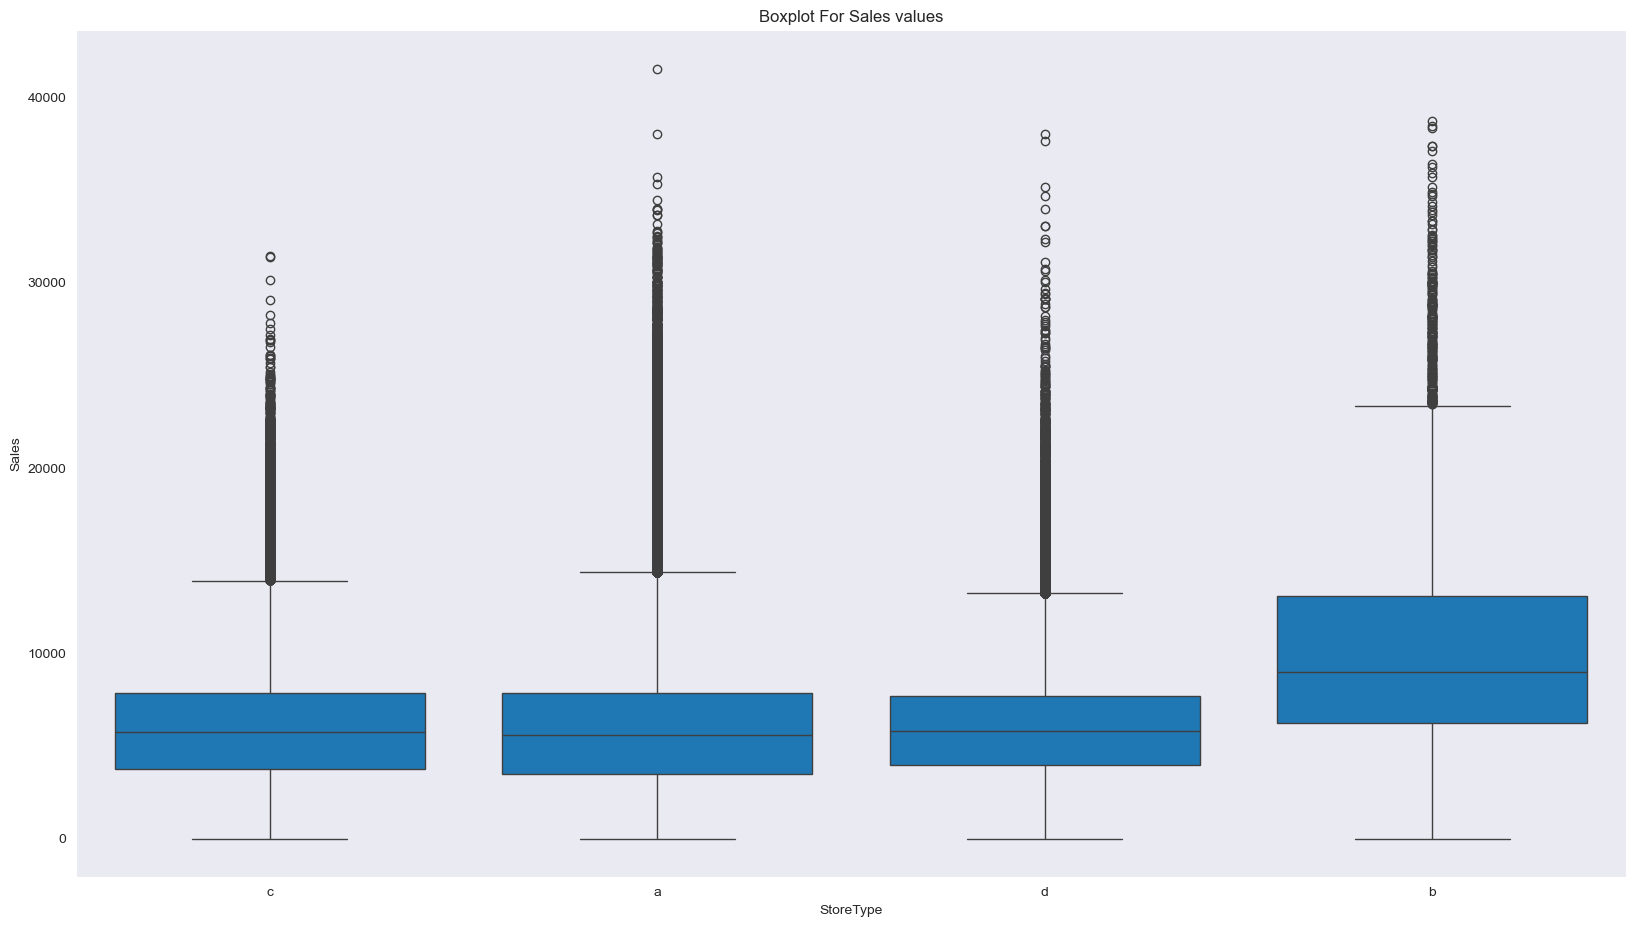

In [37]:
#boxplot for sales value 
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x='StoreType',y='Sales', data=total_df, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales values')

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\3412203866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales = sns.barplot(x='SchoolHoliday', y='Sales', data=total_df,palette='viridis')


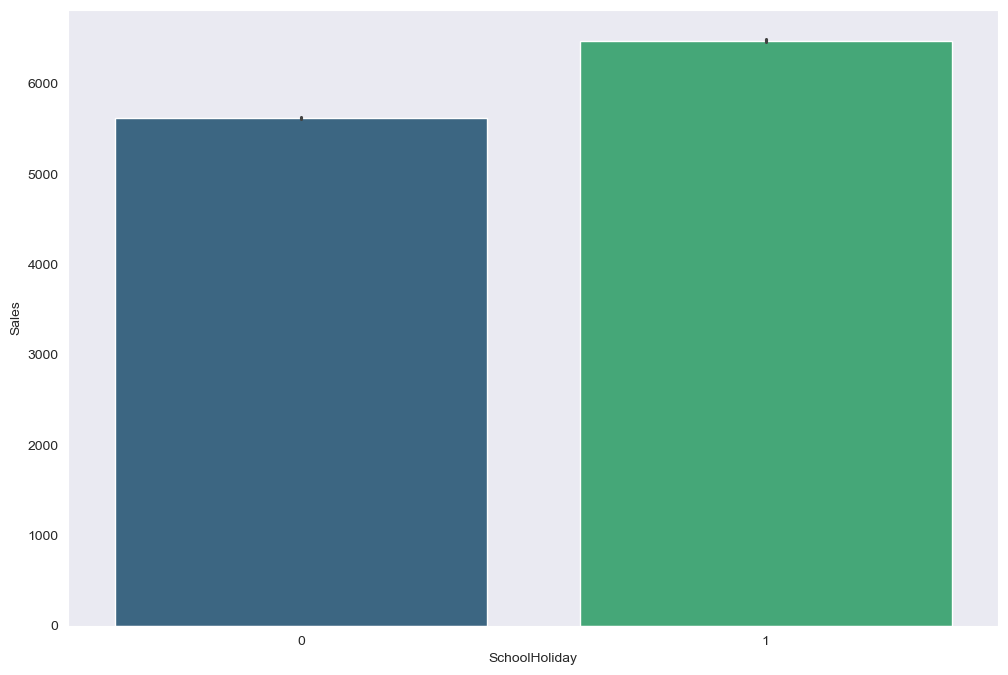

In [38]:
#box plot for schoolholiday and sales
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x='SchoolHoliday', y='Sales', data=total_df,palette='viridis')

Text(0.5, 1.0, 'Store Daily Prom Countplot')

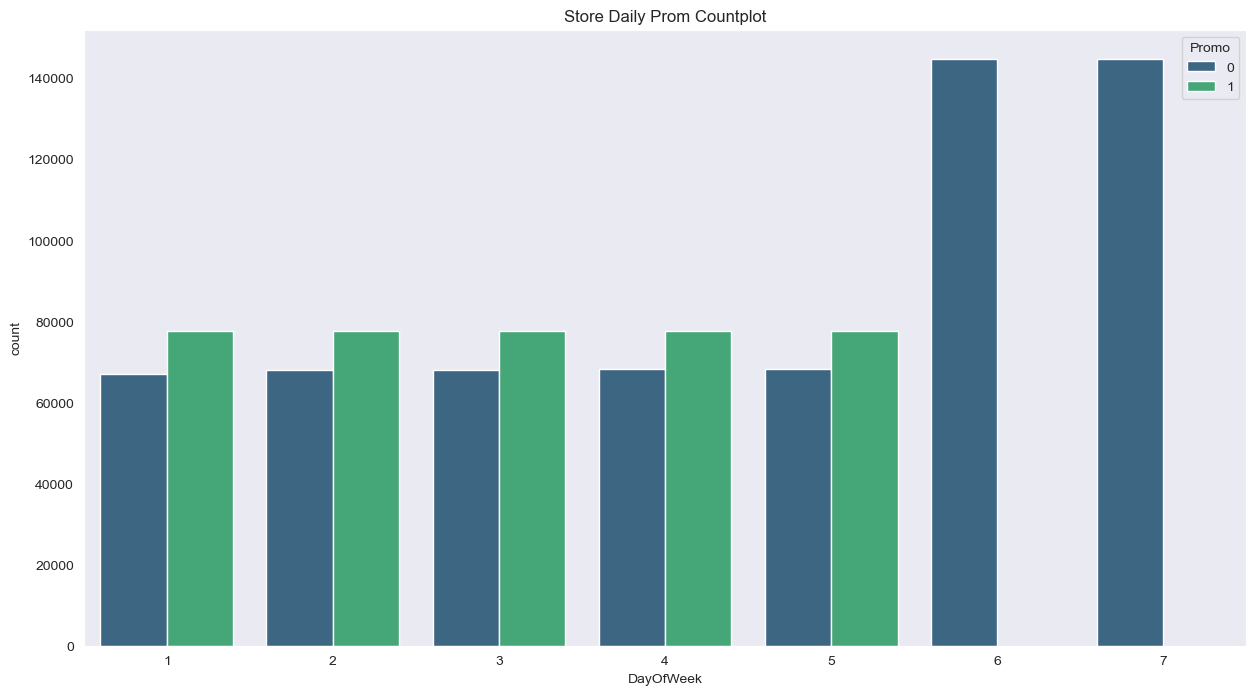

In [39]:
##visualization of store daily promotion 
plt.figure(figsize=(15, 8))
sns.countplot(x='DayOfWeek', hue='Promo',data= total_df, palette='viridis')
plt.title('Store Daily Prom Countplot')

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\3703363256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales = sns.barplot(x='StateHoliday', y='Sales', data=total_df,palette='viridis')


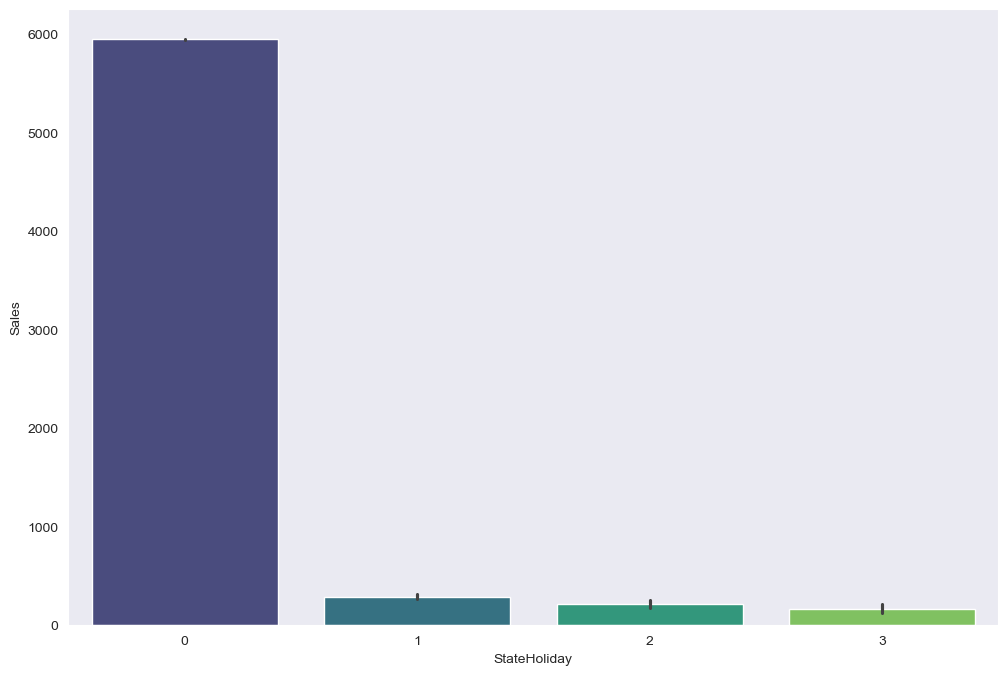

In [40]:
#box plot for StateHoliday and sales
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x='StateHoliday', y='Sales', data=total_df,palette='viridis')

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\4239128887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales = sns.barplot(x='SchoolHoliday', y='Sales', data=total_df,palette='viridis')


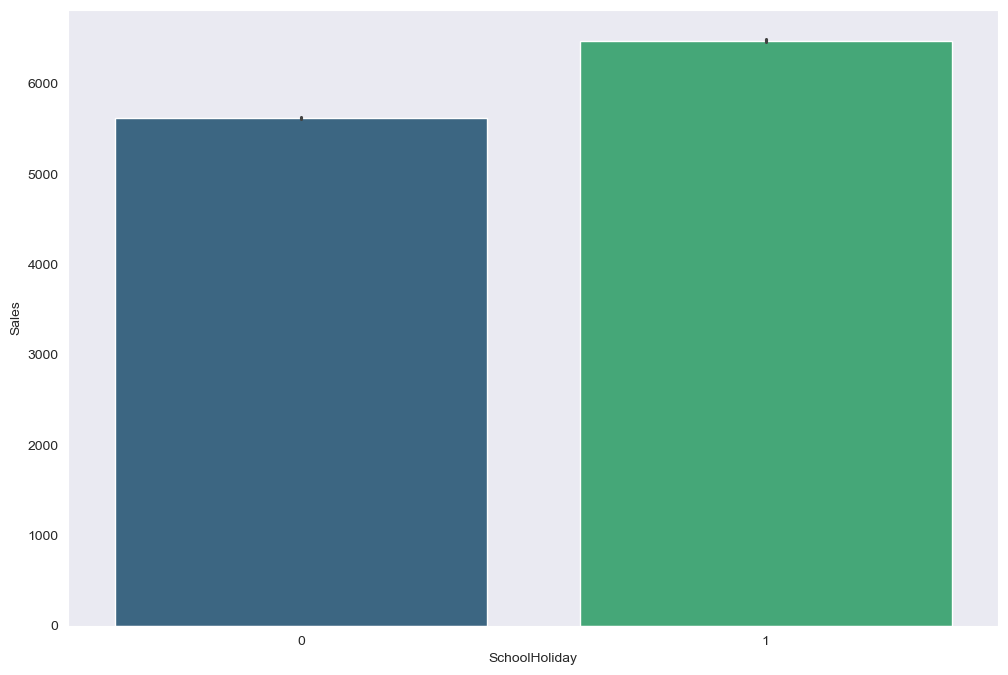

In [41]:
#box plot for SchoolHoliday and sales
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x='SchoolHoliday', y='Sales', data=total_df,palette='viridis')

<Axes: xlabel='Customers', ylabel='Sales'>

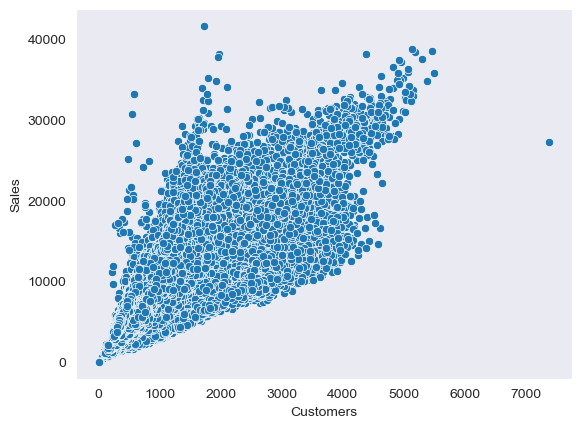

In [42]:
#scatter plots of customers and sales
sns.scatterplot(x=total_df['Customers'], y = total_df['Sales'])

C:\Users\hp\AppData\Local\Temp\ipykernel_31580\15675113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=total_df['Sales'])


<Axes: ylabel='Density'>

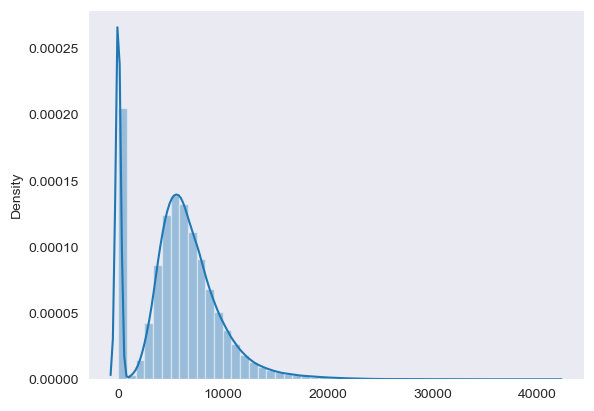

In [44]:
#distrribution plot of sales, as expected positively skewed
sns.distplot(x=total_df['Sales'])

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

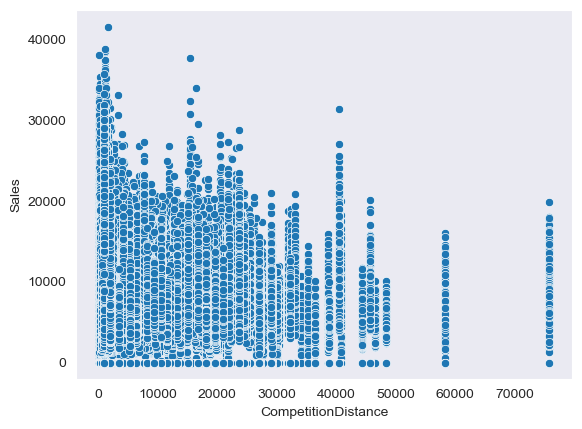

In [45]:
#scatterplot of competition Distance and sales 
sns.scatterplot(x=total_df['CompetitionDistance'],y=total_df['Sales'])

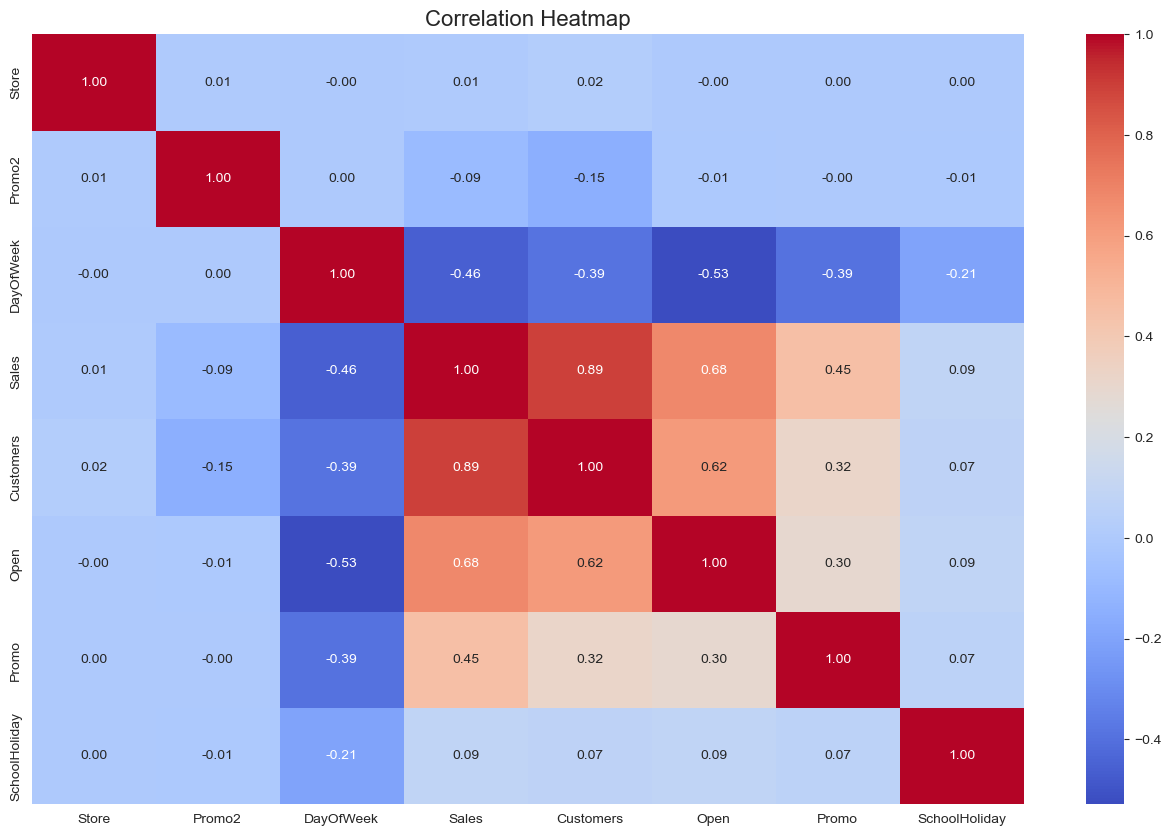

In [48]:
# Select only numeric columns for the correlation matrix
numeric_df = total_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation and plot heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()
